In [ ]:
# Cell 1: Cài đặt và Kiểm tra Môi trường

# Cài đặt các thư viện cần thiết
!pip install ultralytics roboflow -q

# Kiểm tra GPU
!nvidia-smi

# Import các thư viện
import os
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image, display

# Kiểm tra cài đặt của ultralytics
import ultralytics
ultralytics.checks()

# Thiết lập thư mục làm việc
HOME = os.getcwd()
print(f"\nThư mục làm việc hiện tại: {HOME}")

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)

Thư mục làm việc hiện tại: /content


In [ ]:
#!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="XDKE4WlCgR2j0tiYMb3m")
# project = rf.workspace("motorbike-rules-violation-detection").project("traffic-violation-detection-xab49")
# version = project.version(13)
# dataset = version.download("yolov8")


In [ ]:
# Cell 2: Tải Dataset từ Roboflow

# --- THAY ĐỔI CÁC THÔNG TIN CỦA BẠN TẠI ĐÂY ---
ROBOFLOW_API_KEY = "XDKE4WlCgR2j0tiYMb3m"
WORKSPACE_ID = "motorbike-rules-violation-detection"  # Workspace ID của bạn
PROJECT_ID = "traffic-violation-detection-xab49"    # Project ID của bạn
VERSION_NUMBER = 13 # <-- Thay bằng phiên bản dataset mới nhất và tốt nhất của bạn

# --- KẾT THÚC PHẦN THAY ĐỔI ---

# Khởi tạo và tải dataset
try:
    rf = Roboflow(api_key=ROBOFLOW_API_KEY)
    project = rf.workspace(WORKSPACE_ID).project(PROJECT_ID)
    dataset = project.version(VERSION_NUMBER).download("yolov8")
    DATASET_PATH = dataset.location
    print(f"Dataset đã được tải về tại: {DATASET_PATH}")
    # In ra file cấu hình để kiểm tra
    %cat {DATASET_PATH}/data.yaml
except Exception as e:
    print(f"Lỗi khi tải dataset: {e}")
    print("Vui lòng kiểm tra lại API Key và các ID.")
    DATASET_PATH = None

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Violation-Detection-13 in yolov8:: 100%|██████████| 2090/2090 [00:00<00:00, 4875.19it/s]


Dataset đã được tải về tại: /content/Traffic-Violation-Detection-13
names:
- Bus
- Car
- Motor_Wrong_Lane
nc: 3
roboflow:
  license: CC BY 4.0
  project: traffic-violation-detection-xab49
  url: https://universe.roboflow.com/motorbike-rules-violation-detection/traffic-violation-detection-xab49/dataset/13
  version: 13
  workspace: motorbike-rules-violation-detection
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
# Cell 3: Huấn luyện Mô hình YOLOv8

if DATASET_PATH:
    # Lệnh huấn luyện
    !yolo task=detect mode=train \
    model='yolov8m.pt' \
    data='{DATASET_PATH}/data.yaml' \
    epochs=100 \
    imgsz=640 \
    plots=True \
    project='yolov8_training' \
    name='run1'
else:
    print("Không thể bắt đầu huấn luyện vì không có dataset.")

100% 49.7M/49.7M [00:00<00:00, 456MB/s]
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Traffic-Violation-Detection-13/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

In [ ]:
# Cell 4: Đánh giá Mô hình trên Tập Validation

path_to_best_weights = 'yolov8_training/run1/weights/best.pt'

if os.path.exists(path_to_best_weights):
    !yolo task=detect mode=val \
    model='{path_to_best_weights}' \
    data='{DATASET_PATH}/data.yaml'
else:
    print("Không tìm thấy file trọng số 'best.pt'.")

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1691.2±363.9 MB/s, size: 41.3 KB)
val: Scanning /content/Traffic-Violation-Detection-13/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 1206. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.13it/s]
                   all         43       1206      0.944      0.898       0.97      0.797
                   Bus          2          2       0.91          1      0.995      0.946
                   Car         41   

In [ ]:
# Cell 5: Chạy Dự đoán trên Ảnh Test

# Chạy dự đoán trên tất cả các ảnh trong thư mục test
# conf=0.25: Chỉ hiển thị các phát hiện có độ tin cậy trên 25%
if os.path.exists(path_to_best_weights):
    !yolo task=detect mode=predict \
    model='{path_to_best_weights}' \
    conf=0.25 \
    source='{DATASET_PATH}/test/images' \
    save=True
else:
    print("Không tìm thấy file trọng số 'best.pt' để chạy dự đoán.")

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/30 /content/Traffic-Violation-Detection-13/test/images/IMG_0402_MOV-0000_jpg.rf.384a9518be6d99fe3e80ef802e07f7bb.jpg: 384x640 12 Cars, 100 Motor_Wrong_Lanes, 62.9ms
image 2/30 /content/Traffic-Violation-Detection-13/test/images/IMG_0402_MOV-0001_jpg.rf.d0ff258f2a0988626cf6181b54b07980.jpg: 384x640 11 Cars, 100 Motor_Wrong_Lanes, 25.1ms
image 3/30 /content/Traffic-Violation-Detection-13/test/images/IMG_0402_MOV-0002_jpg.rf.e09508155ff1c9c8e527f3a2db5192f6.jpg: 384x640 11 Cars, 108 Motor_Wrong_Lanes, 25.1ms
image 4/30 /content/Traffic-Violation-Detection-13/test/images/IMG_0402_MOV-0003_jpg.rf.7918d68f48276564f782aa94707946dc.jpg: 384x640 12 Cars, 101 Motor_Wrong_Lanes, 25.1ms
image 5/30 /content/Traffic-Violation-Detection-13/test/images/IMG_0402_MOV-0022_jpg.rf.548c71e0e41b1d88c1ea5b2c6a2c7b15.jpg: 384x640 14 Cars,

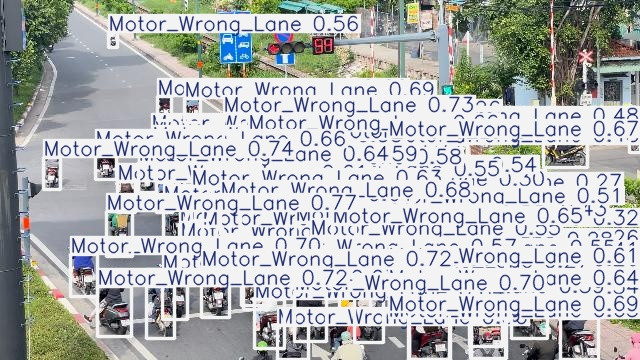

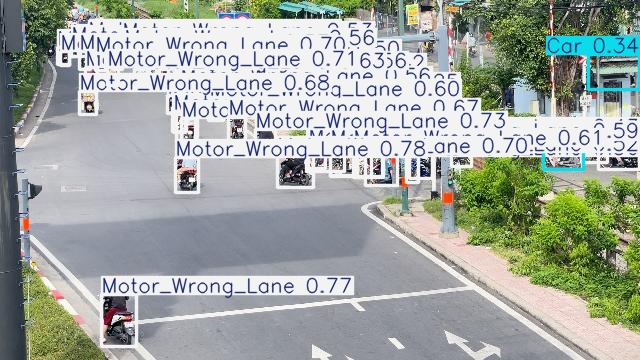

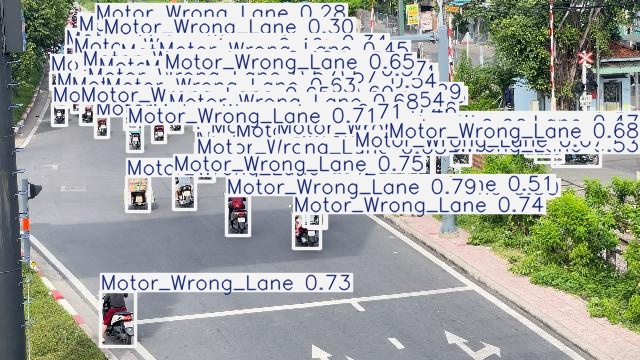

In [ ]:
# Cell 6: Xem Kết quả Dự đoán

import glob

# Lấy đường dẫn của thư mục predict mới nhất
predict_folders = glob.glob('runs/detect/predict*')
latest_predict_folder = sorted(predict_folders, key=os.path.getmtime)[-1] if predict_folders else None

if latest_predict_folder:
    # Hiển thị một vài ảnh kết quả
    for image_file in glob.glob(f'{latest_predict_folder}/*.jpg')[:3]:
        display(Image(filename=image_file, width=600))
else:
    print("Không tìm thấy thư mục kết quả dự đoán.")